In [12]:
import myComponents as tc
import topic as tp
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import os
import datetime

# network parameter
mode = 'PF'
delay_unit = 1

num_broker = 10
num_sub = 80
num_pub = 20


broker_r = 30
broker_rates = [broker_r]*num_broker
topic_dist = [5,5,5,5,5,5,5]
topic_dist = [5,5,5,5]
monitor_rate = 1
runtime = 600
sub_start = 5
sub_end = 35
pub_start = 205
pub_end = 235
prop_delay = 0.01
connection_style = None

# sub parameter
avg_sub_size = 10.0
sub_r = 0.1

sub_rates = [sub_r]*num_sub
sub_num_topic = [100]*num_sub

# pub parameter
avg_pub_size = 20.0
pub_r = 1

pub_rates = [pub_r]*num_pub
pub_num_topic = [100]*num_pub
pub_diameter = [5]*num_pub


wildcard_rate=1
plus_rate=0.3
hash_rate=0.03


seed = 1

diameter = 5
sub_diameter = [diameter]*num_sub

dir_name =str(datetime.date.today())+'_'+str(diameter)+'_'+str(num_broker)+'_'+str(broker_r)+'_'+str(prop_delay)+'_'+str(wildcard_rate*plus_rate)+'_'+str(wildcard_rate*hash_rate)
os.makedirs('./mqtt_data/'+dir_name, exist_ok = True)

sub_waits = open('./mqtt_data/'+dir_name+'/'+mode+'_'+'sub_waits.csv', 'w')
sub_pkt = open('./mqtt_data/'+dir_name+'/'+mode+'_'+'sub_pkt.csv', 'w')
broker_queue = open('./mqtt_data/'+dir_name+'/'+mode+'_'+'broker_queue.csv', 'w')
broker_output = open('./mqtt_data/'+dir_name+'/'+mode+'_'+'broker_output.csv', 'w')
broker_sub = open('./mqtt_data/'+dir_name+'/'+mode+'_'+'sub_queue.csv', 'w')
broker_pub = open('./mqtt_data/'+dir_name+'/'+mode+'_'+'pub_queue.csv', 'w')

tc.SwitchPort.mode = mode
tc.SwitchPort.delay_unit = delay_unit

total_topic = tp.TopicTree(wildcard_rate, plus_rate, hash_rate)
total_topic.random_construct(topic_dist, seed)
#total_topic.visualize(total_topic.root)
net = tc.Network(total_topic, avg_sub_size, avg_pub_size, sub_waits, sub_pkt, broker_queue, 
                 broker_output, broker_sub, broker_pub, qlimit=None, debug=True)
net.initialize_nodes(broker_rates, sub_rates, sub_num_topic, sub_diameter, pub_rates, pub_num_topic, pub_diameter, monitor_rate,
                     sub_start=sub_start, sub_end=sub_end, pub_start=pub_start, pub_end=pub_end, prop_delay=prop_delay, seed=seed)
net.establish_topology(seed)
net.connect_client(connection_style, seed)
print(tc.SwitchPort.mode)


net.env.run(runtime)

sub_waits.close()
sub_pkt.close()
broker_queue.close()
broker_output.close()
broker_sub.close()
broker_pub.close()

#######################################



initializing brokers
broker_id:  1
initializing sub
sub_id:  1
pub_id:  1
PF
current time:  50
current time:  100
current time:  150
current time:  200
current time:  250
current time:  300
current time:  350
current time:  400
current time:  450
current time:  500
current time:  550


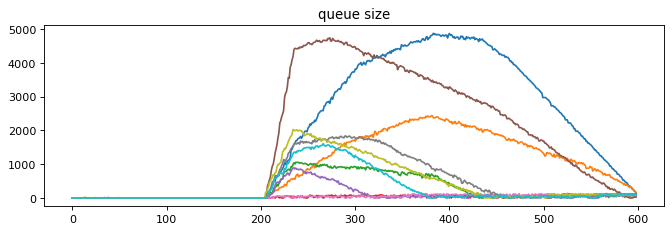

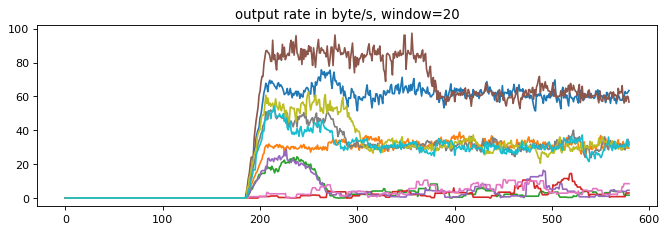

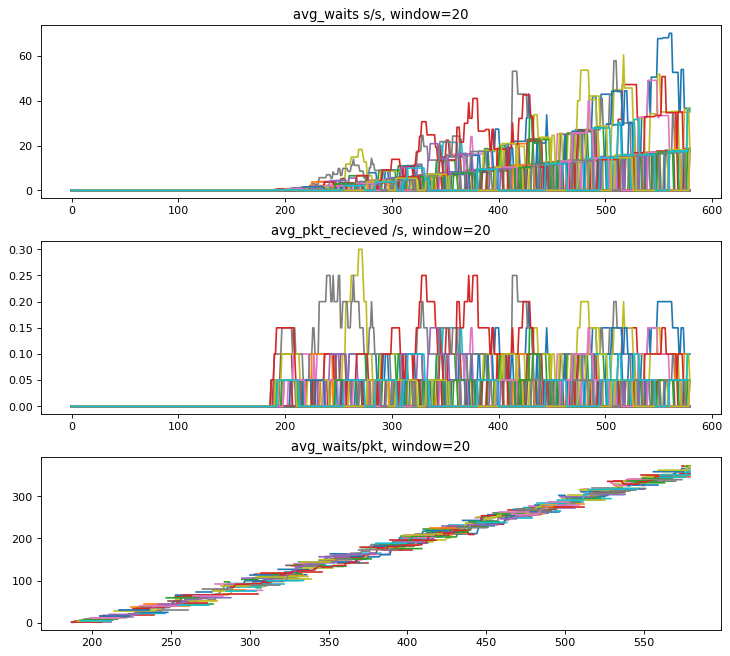

In [13]:
# plot
window = 20
#net.visualize()
plt.figure(figsize=(10, 3), dpi=80)
#monitor.queue_size
#monitor.queue_length
avg_queue_size = np.zeros(100)
for i in range(len(net.broker_monitor_list)):
    monitor = net.broker_monitor_list[i]
    plt.plot(monitor.queue_size, label=monitor.port.sp_id)
#plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.title("queue size")
plt.figure(figsize=(10, 3), dpi=80)
for i in range(len(net.broker_monitor_list)):
    monitor = net.broker_monitor_list[i]
    a = np.array(monitor.bytes_sent)
    b = np.array([0]*window+monitor.bytes_sent[0:-window])
    plt.plot((a-b)[window-1:]/window/monitor_rate, label=monitor.port.sp_id)
#plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.title("output rate in byte/s, window="+str(window))
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 9), dpi=80)

for i in range(len(net.sub_monitor_list)):
    monitor = net.sub_monitor_list[i]
    a = np.array(monitor.packets_rec)
    b = np.array([0]*window+monitor.packets_rec[0:-window])
    avg_packet_rec_per_time = (a-b)[window-1:]/window/monitor_rate
    
    a = np.array(monitor.tot_waits)
    b = np.array([0]*window+monitor.tot_waits[0:-window])
    avg_waits_per_time = (a-b)[window-1:]/window/monitor_rate
    

    plt.subplot(311)
    plt.plot(avg_waits_per_time, label=monitor.client.client_id)
    plt.subplot(312)
    plt.plot(avg_packet_rec_per_time, label=monitor.client.client_id)
    plt.subplot(313)
    plt.plot(avg_waits_per_time/avg_packet_rec_per_time, label=monitor.client.client_id)

plt.subplot(311)
plt.title("avg_waits s/s, window="+str(window))
plt.subplot(312)
plt.title("avg_pkt_recieved /s, window="+str(window))
plt.subplot(313)
plt.title("avg_waits/pkt, window="+str(window))
#plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)

In [56]:
print(net.sub_list[0].start)

5


In [1]:
import myComponents as tc
import topic as tp
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import os
import datetime

# network parameter
mode = 'PF'
delay_unit = 1

num_broker = 10
num_sub = 80
num_pub = 20


broker_r = 30
broker_rates = [broker_r]*num_broker
topic_dist = [5,5,5,5,5,5,5]
topic_dist = [5,5,5,5]
monitor_rate = 1
runtime = 500
sub_start = 0
sub_end = 35
pub_start = 0
pub_end = 35
prop_delay = 0.01
connection_style = None

# sub parameter
avg_sub_size = 10.0
sub_r = 0.1

sub_rates = [sub_r]*num_sub
sub_num_topic = [100]*num_sub

# pub parameter
avg_pub_size = 20.0
pub_r = 1

pub_rates = [pub_r]*num_pub
pub_num_topic = [100]*num_pub
pub_diameter = [5]*num_pub


wildcard_rate=1
plus_rate=0.3
hash_rate=0.03


seed = 1

diameter = 5
sub_diameter = [diameter]*num_sub

dir_name =str(datetime.date.today())+'_'+str(diameter)+'_'+str(num_broker)+'_'+str(broker_r)+'_'+str(prop_delay)+'_'+str(wildcard_rate*plus_rate)+'_'+str(wildcard_rate*hash_rate)
os.makedirs('./mqtt_data/'+dir_name, exist_ok = True)

sub_waits = open('./mqtt_data/'+dir_name+'/'+mode+'_'+'sub_waits.csv', 'w')
sub_pkt = open('./mqtt_data/'+dir_name+'/'+mode+'_'+'sub_pkt.csv', 'w')
broker_queue = open('./mqtt_data/'+dir_name+'/'+mode+'_'+'broker_queue.csv', 'w')
broker_output = open('./mqtt_data/'+dir_name+'/'+mode+'_'+'broker_output.csv', 'w')
broker_sub = open('./mqtt_data/'+dir_name+'/'+mode+'_'+'sub_queue.csv', 'w')
broker_pub = open('./mqtt_data/'+dir_name+'/'+mode+'_'+'pub_queue.csv', 'w')

tc.SwitchPort.mode = mode
tc.SwitchPort.delay_unit = delay_unit

total_topic = tp.TopicTree(wildcard_rate, plus_rate, hash_rate)
total_topic.random_construct(topic_dist, seed)
#total_topic.visualize(total_topic.root)
net = tc.Network(total_topic, avg_sub_size, avg_pub_size, sub_waits, sub_pkt, broker_queue, 
                 broker_output, broker_sub, broker_pub, qlimit=None, debug=True)
net.initialize_nodes(broker_rates, sub_rates, sub_num_topic, sub_diameter, pub_rates, pub_num_topic, pub_diameter, monitor_rate,
                     sub_start=sub_start, sub_end=sub_end, pub_start=pub_start, pub_end=pub_end, prop_delay=prop_delay, seed=seed)
net.establish_topology(seed)
net.connect_client(connection_style, seed)
print(tc.SwitchPort.mode)


net.env.run(runtime)

sub_waits.close()
sub_pkt.close()
broker_queue.close()
broker_output.close()
broker_sub.close()
broker_pub.close()

#######################################



initializing brokers
broker_id:  1
initializing sub
sub_id:  1
pub_id:  1
PF
current time:  50
current time:  100
current time:  150
current time:  200
current time:  250
current time:  300
current time:  350
current time:  400
current time:  450


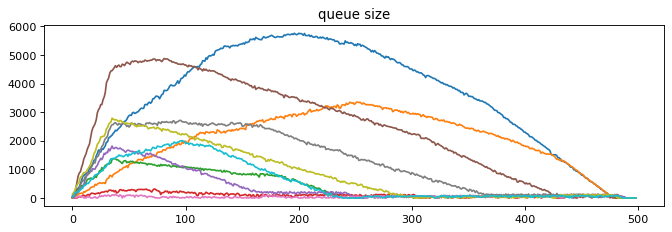

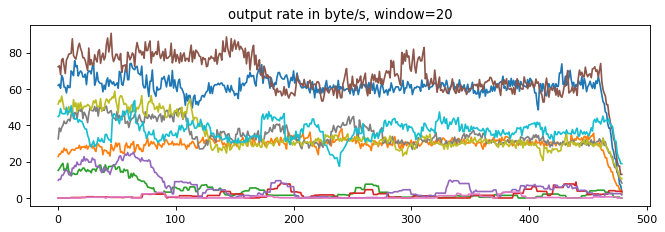

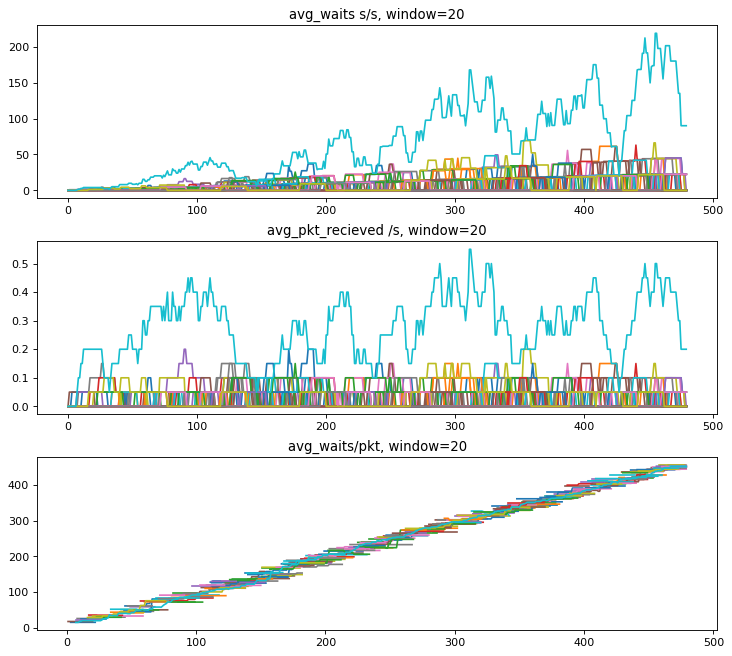

In [2]:
# plot
window = 20
#net.visualize()
plt.figure(figsize=(10, 3), dpi=80)
#monitor.queue_size
#monitor.queue_length
avg_queue_size = np.zeros(100)
for i in range(len(net.broker_monitor_list)):
    monitor = net.broker_monitor_list[i]
    plt.plot(monitor.queue_size, label=monitor.port.sp_id)
#plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.title("queue size")
plt.figure(figsize=(10, 3), dpi=80)
for i in range(len(net.broker_monitor_list)):
    monitor = net.broker_monitor_list[i]
    a = np.array(monitor.bytes_sent)
    b = np.array([0]*window+monitor.bytes_sent[0:-window])
    plt.plot((a-b)[window-1:]/window/monitor_rate, label=monitor.port.sp_id)
#plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.title("output rate in byte/s, window="+str(window))
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 9), dpi=80)

for i in range(len(net.sub_monitor_list)):
    monitor = net.sub_monitor_list[i]
    a = np.array(monitor.packets_rec)
    b = np.array([0]*window+monitor.packets_rec[0:-window])
    avg_packet_rec_per_time = (a-b)[window-1:]/window/monitor_rate
    
    a = np.array(monitor.tot_waits)
    b = np.array([0]*window+monitor.tot_waits[0:-window])
    avg_waits_per_time = (a-b)[window-1:]/window/monitor_rate
    

    plt.subplot(311)
    plt.plot(avg_waits_per_time, label=monitor.client.client_id)
    plt.subplot(312)
    plt.plot(avg_packet_rec_per_time, label=monitor.client.client_id)
    plt.subplot(313)
    plt.plot(avg_waits_per_time/avg_packet_rec_per_time, label=monitor.client.client_id)

plt.subplot(311)
plt.title("avg_waits s/s, window="+str(window))
plt.subplot(312)
plt.title("avg_pkt_recieved /s, window="+str(window))
plt.subplot(313)
plt.title("avg_waits/pkt, window="+str(window))
#plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)

In [36]:
print(net.broker_list[0].prop_delay)

1
